# Health Analysis

In [13]:
%run analysis_functions.ipynb

In [14]:
df, arguments = read_clean_data()
sheet_id = arguments["sheet_id"]
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}"

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Cervical mucus charting

In [4]:
chart = chart_cervical_mucus(
    df,
    with_text=False,
    outfile="charting",
)

### ![](charting.png)

In [5]:
chart = chart_cervical_mucus(
    df,
    with_text=True,
    outfile="charting_with_text",
)

### ![](charting_with_text.png)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Symptoms snapshot

In [6]:
numeric_metrics = [
    "BMs",
    "previous night Oura score",
    "steps",
]

categorical_metrics = [
    "pelvic pain",
    "stomach pain",
    "fatigue",
    "headache",
    "uncomfortable stomach",
    "bloated stomach",
    "diarrhea",
    "nauseous",
    "white clouds in urine",
]

#### Last month

In [7]:
# last N days, excluding most recent, incomplete day
last_n_days = 30
start_dt = df[- last_n_days - 1: -1].index.min()
end_dt = df[- last_n_days - 1: -1].index.max()
min_pain = 4

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
    min_pain=min_pain,
)
print(summary)

02/14/24 - 03/14/24

87% of days had fatigue.
80% of days had uncomfortable stomach.
77% of days had headache.
67% of days had pelvic pain at least 5 / 10.
63% of days had stomach pain at least 5 / 10.
60% of days had bloated stomach.
53% of days had white clouds in urine.
43% of days had nausea.
30% of days had diarrhea.

3 BMs / day
85 / 100 sleep score
8,467 steps / day



In [8]:
# Right before second surgery
start_dt = datetime.datetime(2023, 9, 1)
end_dt = datetime.datetime(2023, 9, 26)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Medications

#### Yesterday

In [9]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 1

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

03/14/24

8 mg THC / day
40 mg Omeprazole / day
8 mg CBD / day
25 mg DHEA / day
1800 mg N-acetyl L-Cysteine / day
250 mg Vitamin B6 / day
1000 mg Metformin / day
50 mg Pycnogenol / day
4000 mg Myo-Inositol / day
1000 mcg Vitamin B12 / day
4000 IU Vitamin D3 / day



#### Last month

In [10]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 30

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

02/14/24 - 03/14/24

150 mg Acetaminophen / day
12 mg THC / day
40 mg Omeprazole / day
12 mg CBD / day
25 mg DHEA / day
1740 mg N-acetyl L-Cysteine / day
250 mg Vitamin B6 / day
750 mg Metformin / day
50 mg Pycnogenol / day
3787 mg Myo-Inositol / day
1000 mcg Vitamin B12 / day
3867 IU Vitamin D3 / day



#### Over time

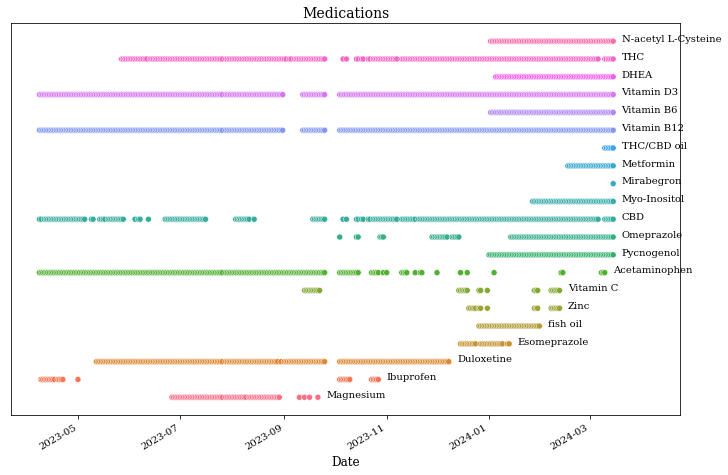

In [11]:
plot_meds_over_time(df)

### Diet

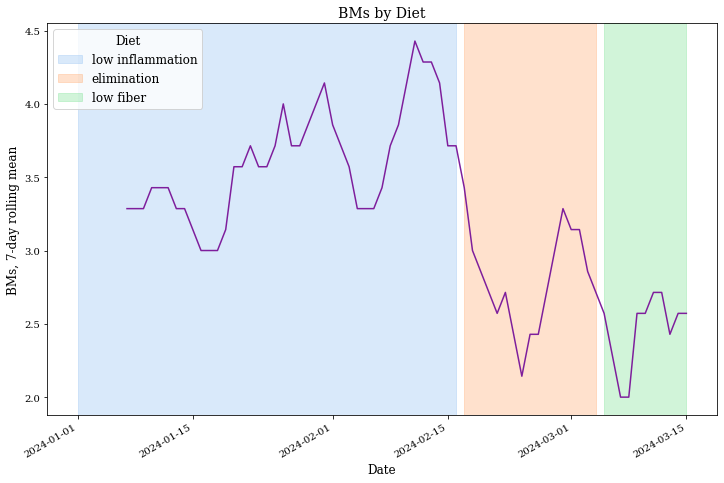

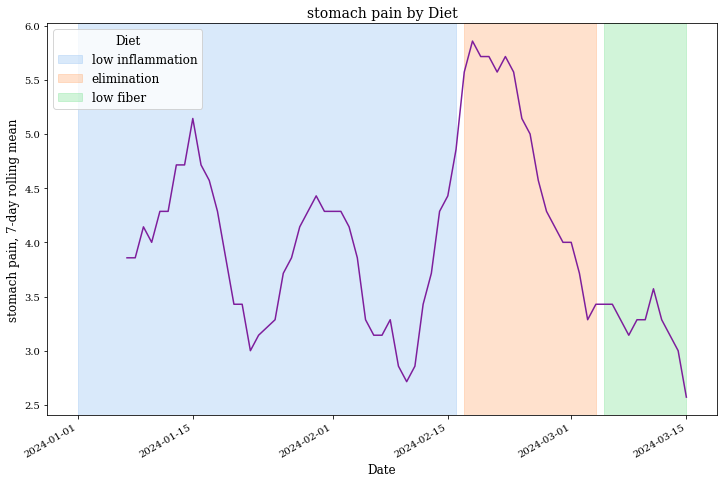

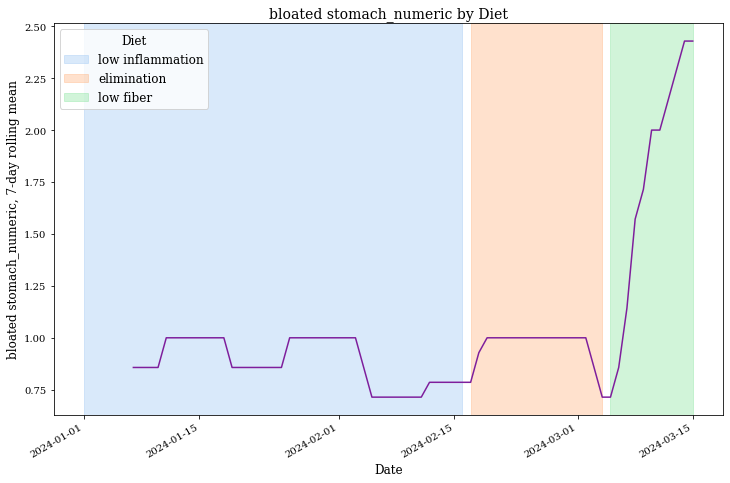

In [14]:
diets = ["low inflammation", "elimination", "low fiber"]
df, metric_data, diet_data, metrics_dict = get_diet_data(df, diets)
start_dt = pd.datetime(2024, 1, 1)

metrics = [
    "BMs",
    "stomach pain",
]
for metric in metrics:
    plot_diet_metric(metric, df, diet_data, start_dt)

#### T-test comparing diets

In [15]:
control_diet = "elimination"
other_diets = ["low inflammation", "low fiber"]

# remove transition period, before diet can have an effect
transition_days = 14

for other_diet in other_diets:
    print(f"{other_diet} vs. {control_diet}")
    
    control = df[df["diet name"] == control_diet][transition_days:]
    other = df[df["diet name"] == other_diet][transition_days:]

    for metric in metrics:
        stat, p = ttest_ind(
            other[metric].dropna(),
            control[metric].dropna(),
        )
        ratio = other[metric].mean() / control[metric].mean()
        print(f"{metric}: {round(stat, 2)}, p={round(p, 3)}")
        print()

BMs: -2.75, p=0.007
stomach pain: 1.91, p=0.058
bloated stomach_numeric: 2.38, p=0.019
